In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
cases = pd.read_json('https://data.cdc.gov/resource/9mfq-cb36.json?$limit=35000') # limit is required to pull more rows
# if len says at limit, increase the value

In [4]:
cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2020-02-08T00:00:00.000,AL,55,47.0,8.0,1,0.0,0,0.0,0.0,0,0.0,2020-02-10 00:00:00.000,Agree,Agree
1,2021-02-02T00:00:00.000,IL,1130917,1130917.0,0.0,2304,0.0,21336,19306.0,2030.0,63,16.0,2021-02-03 14:55:58.025,Agree,Agree
2,2020-07-30T00:00:00.000,ME,3910,3497.0,413.0,22,2.0,123,122.0,1.0,2,0.0,2020-07-31 14:35:06.518,Agree,Agree
3,2020-03-29T00:00:00.000,AL,2634,2532.0,102.0,129,3.0,32,29.0,3.0,5,0.0,2020-03-31 00:00:00.000,Agree,Agree
4,2020-05-03T00:00:00.000,NH,2518,NaN,NaN,89,0.0,86,NaN,NaN,2,0.0,2020-05-04 22:49:24.344,Not agree,Not agree


In [5]:
len(cases)

34500

In [6]:
cases['state'].unique()

array(['AL', 'IL', 'ME', 'NH', 'GU', 'CT', 'WI', 'NV', 'ND', 'MO', 'MD',
       'IN', 'ID', 'VT', 'MI', 'MS', 'VI', 'NC', 'DE', 'MT', 'WA', 'NE',
       'CA', 'OR', 'FSM', 'NJ', 'KY', 'DC', 'WY', 'RI', 'AZ', 'SC', 'LA',
       'VA', 'MN', 'KS', 'TX', 'AR', 'MP', 'AS', 'MA', 'PR', 'NYC', 'PW',
       'GA', 'FL', 'AK', 'CO', 'HI', 'OK', 'UT', 'WV', 'RMI', 'IA', 'OH',
       'NY', 'SD', 'TN', 'PA', 'NM'], dtype=object)

In [7]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  34500 non-null  object        
 1   state            34500 non-null  object        
 2   tot_cases        34500 non-null  int64         
 3   conf_cases       17229 non-null  float64       
 4   prob_cases       17158 non-null  float64       
 5   new_case         34500 non-null  int64         
 6   pnew_case        30264 non-null  float64       
 7   tot_death        34500 non-null  int64         
 8   conf_death       17700 non-null  float64       
 9   prob_death       17700 non-null  float64       
 10  new_death        34500 non-null  int64         
 11  pnew_death       30204 non-null  float64       
 12  created_at       34500 non-null  datetime64[ns]
 13  consent_cases    31625 non-null  object        
 14  consent_deaths   31625 non-null  objec

In [8]:
cases['date'] = pd.to_datetime(cases['created_at'])

<AxesSubplot:xlabel='date'>

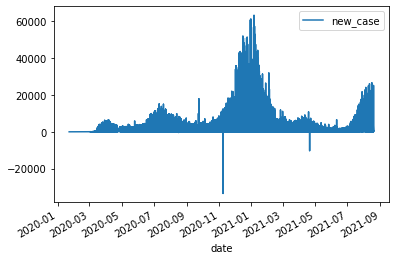

In [9]:
cases.plot('date','new_case')

In [10]:
la_case = cases[cases['state']=='LA'].copy()
la_case.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,date
6633,2020-10-06T00:00:00.000,LA,170469,NaN,NaN,532,0.0,5592,5402.0,190.0,6,0.0,2020-10-07 13:45:01.309,Not agree,Agree,2020-10-07 13:45:01.309
6645,2021-01-14T00:00:00.000,LA,361148,NaN,NaN,5313,2187.0,8080,7631.0,449.0,58,9.0,2021-01-15 14:46:04.456,Not agree,Agree,2021-01-15 14:46:04.456
6649,2020-12-22T00:00:00.000,LA,290960,NaN,NaN,3699,933.0,7158,6813.0,345.0,51,13.0,2020-12-23 14:36:58.341,Not agree,Agree,2020-12-23 14:36:58.341
6652,2020-02-08T00:00:00.000,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39.452,Not agree,Agree,2020-03-26 16:22:39.452
6654,2020-07-19T00:00:00.000,LA,91706,NaN,NaN,3116,0.0,3543,3433.0,110.0,34,0.0,2020-07-20 14:35:44.367,Not agree,Agree,2020-07-20 14:35:44.367


In [11]:
la_case['date'].dtype

dtype('<M8[ns]')

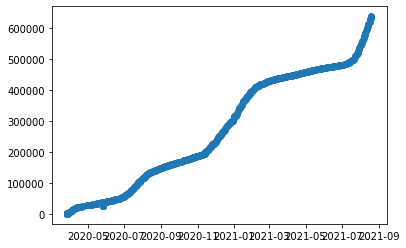

In [12]:
plt.scatter(la_case['date'],la_case['tot_cases'])

<AxesSubplot:xlabel='date'>

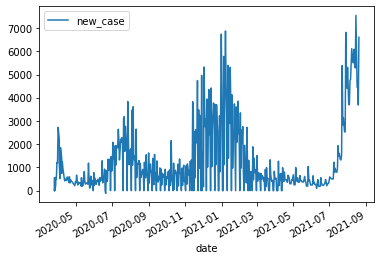

In [13]:
la_case.plot('date','new_case')

In [14]:
la_case.sort_values(by='date', inplace=True)

In [15]:
la_case['seven_day_case_avg'] = la_case['new_case'].rolling(7,1).mean()

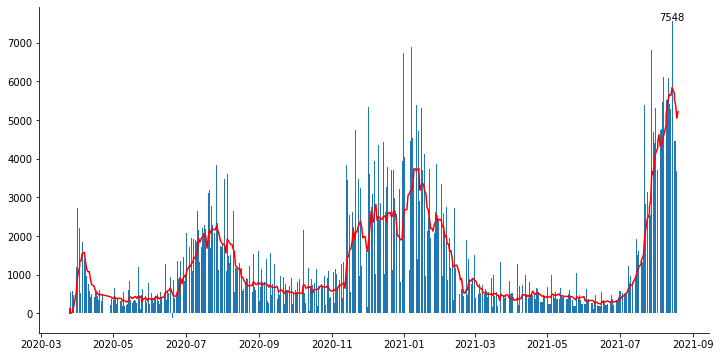

In [16]:
fig,ax = plt.subplots(figsize=(12,6))

p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.bar(la_case['date'].dt.date, la_case['new_case'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case['new_case'].max()
peak_date = la_case.loc[la_case['new_case'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+20), ha='center')

plt.show()

In [17]:
import datetime as dt

In [18]:
offset_date = dt.date.today()-dt.timedelta(90)

In [19]:
la_case_3m = la_case[la_case['date'].dt.date>offset_date].copy()

In [20]:
la_case.iloc[0]

submission_date          2020-03-13T00:00:00.000
state                                         LA
tot_cases                                     33
conf_cases                                   NaN
prob_cases                                   NaN
new_case                                      19
pnew_case                                    NaN
tot_death                                      0
conf_death                                   NaN
prob_death                                   NaN
new_death                                      0
pnew_death                                   NaN
created_at            2020-03-26 16:22:39.452000
consent_cases                          Not agree
consent_deaths                             Agree
date                  2020-03-26 16:22:39.452000
seven_day_case_avg                            19
Name: 8119, dtype: object

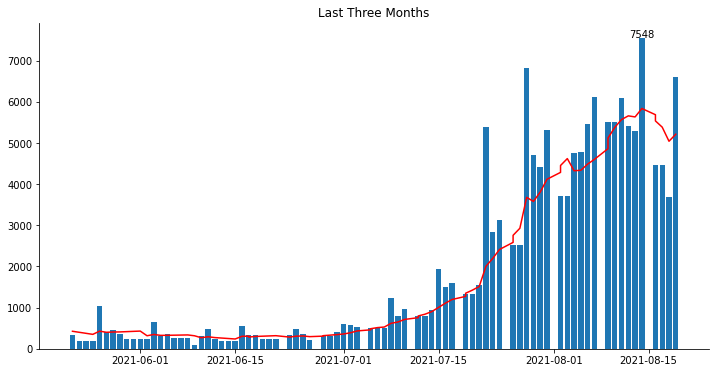

In [21]:
fig,ax = plt.subplots(figsize=(12,6))

p1 = ax.plot(la_case_3m['date'].dt.date, la_case_3m['seven_day_case_avg'], c='r')
b1 = ax.bar(la_case_3m['date'].dt.date, la_case_3m['new_case'])

ax.set_title('Last Three Months')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case_3m['new_case'].max()
peak_date = la_case_3m.loc[la_case_3m['new_case'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+10), ha='center')

plt.show()

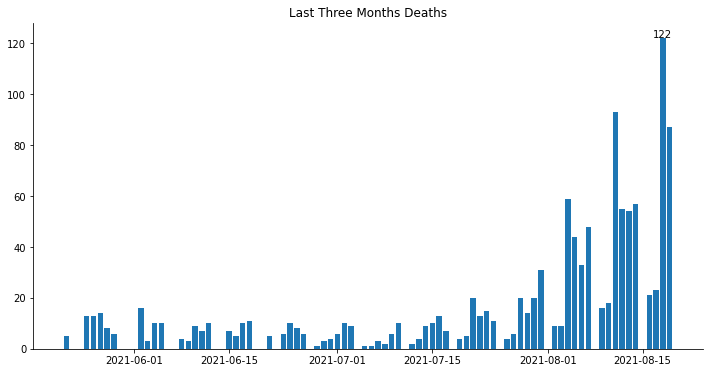

In [22]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case_3m['date'].dt.date, la_case_3m['seven_day_case_avg'], c='k')
b1 = ax.bar(la_case_3m['date'].dt.date, la_case_3m['new_death'])

ax.set_title('Last Three Months Deaths')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case_3m['new_death'].max()
peak_date = la_case_3m.loc[la_case_3m['new_death'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+.25), ha='center')

plt.show()

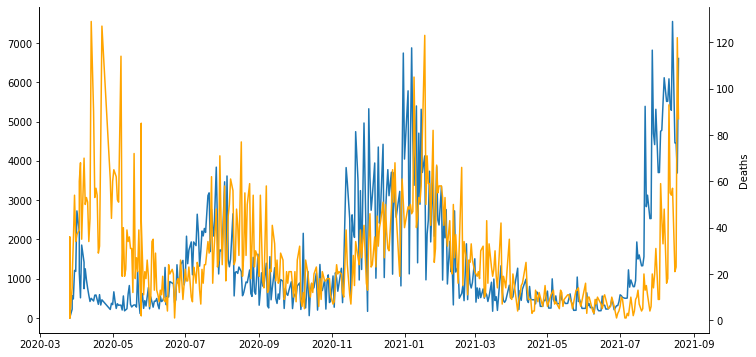

In [23]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.plot(la_case[la_case['new_case']>0]['date'].dt.date, la_case[la_case['new_case']>0]['new_case'])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
b2 = ax2.plot(la_case[la_case['new_death']>0]['date'].dt.date, la_case[la_case['new_death']>0]['new_death'], c='orange')
ax2.set_ylabel("Deaths")

ax2.spines['top'].set_visible(False)

plt.show()

In [24]:
from sklearn.preprocessing import scale

In [25]:
la_case_death = la_case[['new_case','new_death']]
la_case_death.describe()

,new_case,new_death
count,575.000000,575.000000
mean,1109.528696,20.509565
std,1418.574430,22.224923
min,-119.000000,-21.000000
25%,234.000000,3.000000
50%,541.000000,14.000000
75%,1328.500000,30.500000
max,7548.000000,129.000000


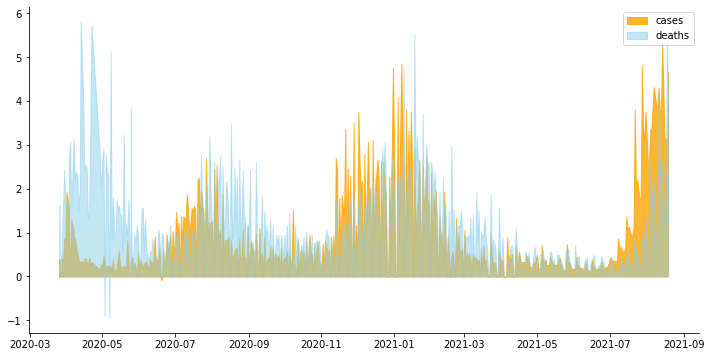

In [26]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.fill_between(la_case['date'].dt.date, scale(la_case['new_case'],with_mean=False),
                     color='orange', alpha=0.8, label='cases')
b2 = ax.fill_between(la_case['date'].dt.date, scale(la_case['new_death'],with_mean=False),
                     color='skyblue', alpha=0.5, label='deaths')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

plt.show()

In [27]:
la_case[['date','new_case','new_death']].tail(30)

,date,new_case,new_death
9034,2021-07-21 14:18:34.888,1562,20
32443,2021-07-22 15:06:50.836,5388,13
9067,2021-07-23 13:48:31.666,2834,15
32247,2021-07-24 14:21:11.369,3127,11
33802,2021-07-26 13:16:36.357,2530,4
9868,2021-07-26 13:52:25.259,2530,4
8458,2021-07-27 14:48:23.791,2532,6
31201,2021-07-28 13:51:39.509,6818,20
33727,2021-07-29 13:49:46.674,4699,14
33929,2021-07-30 14:36:41.067,4414,20
